## Imports

In [1]:
import pandas as pd
from pandas.testing import assert_frame_equal
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn import metrics
import statsmodels.api as sm
import warnings
warnings.filterwarnings('ignore')
from wordcloud import WordCloud

C:\Users\tarci\AppData\Local\Temp\ipykernel_10176\214367169.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


## Carregando Dataset

In [2]:
data_frame_movies = pd.read_csv("./datasets/desafio_indicium_imdb.csv", encoding="utf-8")

## EDA

<p>Esta análise iniciará-se por meio da identificação das variáveis do dataset.

In [3]:
data_frame_movies.columns

Index(['Unnamed: 0', 'Series_Title', 'Released_Year', 'Certificate', 'Runtime',
       'Genre', 'IMDB_Rating', 'Overview', 'Meta_score', 'Director', 'Star1',
       'Star2', 'Star3', 'Star4', 'No_of_Votes', 'Gross'],
      dtype='object')

<p> Por meio método <i>.columns</i> é possível identicar os nomes de todas as colunas (variáveis) presentes no dataset. Dessa forma, identifica-se que a coluna <strong>Unnamed: 0 </strong> parece não pertencer ao conjunto de dados ou não está identificada de forma coerente com seus dados. Dessa forma, a próxima análise será explorar o cabeçalho do dataframe com a função <i>.head()</i></p>

In [4]:
data_frame_movies.head(5)

,Unnamed: 0,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
0,1,The Godfather,1972,A,175 min,"Crime, Drama",9.2,An organized crime dynasty's aging patriarch t...,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,"134,966,411"
1,2,The Dark Knight,2008,UA,152 min,"Action, Crime, Drama",9.0,When the menace known as the Joker wreaks havo...,84.0,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,"534,858,444"
2,3,The Godfather: Part II,1974,A,202 min,"Crime, Drama",9.0,The early life and career of Vito Corleone in ...,90.0,Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton,1129952,"57,300,000"
3,4,12 Angry Men,1957,U,96 min,"Crime, Drama",9.0,A jury holdout attempts to prevent a miscarria...,96.0,Sidney Lumet,Henry Fonda,Lee J. Cobb,Martin Balsam,John Fiedler,689845,"4,360,000"
4,5,The Lord of the Rings: The Return of the King,2003,U,201 min,"Action, Adventure, Drama",8.9,Gandalf and Aragorn lead the World of Men agai...,94.0,Peter Jackson,Elijah Wood,Viggo Mortensen,Ian McKellen,Orlando Bloom,1642758,"377,845,905"


<p>De acordo com a análise da tabela acima, é possível inferir-se que a variável "Unnamed: 0" pode ter relação com a variável "IMDB_Rating", i.e, a coluna "Unnamed: 0" seria o rankeamento dos filmes com maior classificação "IMDB_Rating". No entanto, para comprovar essa teoria, deverá ser feita a estatística descritiva da coluna "IMDB_Rating" a fim de comprovar-se que o primeiro valor é o maior do dataset e uma posterior ordenação da tabela com base nessa coluna pra validar a ordem classificatória descedente.

In [5]:
data_frame_movies["IMDB_Rating"].describe()

count    999.000000
mean       7.947948
std        0.272290
min        7.600000
25%        7.700000
50%        7.900000
75%        8.100000
max        9.200000
Name: IMDB_Rating, dtype: float64

<p>Comprova-se aqui que o maior valor na coluna "IMDB_Rating" é 9.2, que aparece na primeira tupla. Ainda é posspivel identificar por análise dos quartis que os valores nessa coluna parecem estar em ordem descendente, o que validaria a hipótese de que a coluna "Unnamed: 0" é o ranking dos filmes com maior IMDB. 

In [6]:
sorted_by_imdb_rating = data_frame_movies.sort_values(by="IMDB_Rating", ascending=False)
sorted_by_imdb_rating.head()

,Unnamed: 0,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
0,1,The Godfather,1972,A,175 min,"Crime, Drama",9.2,An organized crime dynasty's aging patriarch t...,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,"134,966,411"
2,3,The Godfather: Part II,1974,A,202 min,"Crime, Drama",9.0,The early life and career of Vito Corleone in ...,90.0,Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton,1129952,"57,300,000"
3,4,12 Angry Men,1957,U,96 min,"Crime, Drama",9.0,A jury holdout attempts to prevent a miscarria...,96.0,Sidney Lumet,Henry Fonda,Lee J. Cobb,Martin Balsam,John Fiedler,689845,"4,360,000"
1,2,The Dark Knight,2008,UA,152 min,"Action, Crime, Drama",9.0,When the menace known as the Joker wreaks havo...,84.0,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,"534,858,444"
4,5,The Lord of the Rings: The Return of the King,2003,U,201 min,"Action, Adventure, Drama",8.9,Gandalf and Aragorn lead the World of Men agai...,94.0,Peter Jackson,Elijah Wood,Viggo Mortensen,Ian McKellen,Orlando Bloom,1642758,"377,845,905"


<p>Como visto acima, as colunas "Index" e "Unnamed: 0" não estão na mesma ordem, embora a classificação IMDB ainda pareça estar descendete. Será aplicada a função <i>assert_frame_equal()</i> da biblioteca pandas a fim de analisar o quão diferente essas variáveis estão.

In [7]:
assert_frame_equal(data_frame_movies, sorted_by_imdb_rating)

AssertionError: DataFrame.index are different

DataFrame.index values are different (98.8989 %)
[left]:  RangeIndex(start=0, stop=999, step=1)
[right]: Index([  0,   2,   3,   1,   4,   5,   6,   7,   8,   9,
       ...
       916, 915, 914, 913, 912, 911, 910, 909, 908, 998],
      dtype='int64', length=999)
At positional index 1, first diff: 1 != 2

<p>Conforme o teste realizado pela função de asserção, tem-se que as variáveis têm <strong>98.8989 %</strong> de diferença entre si. Esse valor invalida a hipóstese criada de que a coluna "Unnamed: 0" seria o rankeamento dos filmes por IMDB. Dessa forma, a análise continuará com um novo dataframe criado a partir de <i>sorted_by_imdb_rating</i> onde a variável "Unnamed: 0" será eliminada visto que o conjunto de dados encontra-se agora ordenado pelo IMDB.  

In [8]:
movies_rated_by_imdb = sorted_by_imdb_rating.iloc[: , 1:]
movies_rated_by_imdb.head(5)

,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
0,The Godfather,1972,A,175 min,"Crime, Drama",9.2,An organized crime dynasty's aging patriarch t...,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,"134,966,411"
2,The Godfather: Part II,1974,A,202 min,"Crime, Drama",9.0,The early life and career of Vito Corleone in ...,90.0,Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton,1129952,"57,300,000"
3,12 Angry Men,1957,U,96 min,"Crime, Drama",9.0,A jury holdout attempts to prevent a miscarria...,96.0,Sidney Lumet,Henry Fonda,Lee J. Cobb,Martin Balsam,John Fiedler,689845,"4,360,000"
1,The Dark Knight,2008,UA,152 min,"Action, Crime, Drama",9.0,When the menace known as the Joker wreaks havo...,84.0,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,"534,858,444"
4,The Lord of the Rings: The Return of the King,2003,U,201 min,"Action, Adventure, Drama",8.9,Gandalf and Aragorn lead the World of Men agai...,94.0,Peter Jackson,Elijah Wood,Viggo Mortensen,Ian McKellen,Orlando Bloom,1642758,"377,845,905"


<p>Agora serão feitas as estatísticas descritivas com uso das funcões <i>.info()</i> e <i>.describe()</i>

In [9]:
movies_rated_by_imdb.info()

<class 'pandas.core.frame.DataFrame'>
Index: 999 entries, 0 to 998
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Series_Title   999 non-null    object 
 1   Released_Year  999 non-null    object 
 2   Certificate    898 non-null    object 
 3   Runtime        999 non-null    object 
 4   Genre          999 non-null    object 
 5   IMDB_Rating    999 non-null    float64
 6   Overview       999 non-null    object 
 7   Meta_score     842 non-null    float64
 8   Director       999 non-null    object 
 9   Star1          999 non-null    object 
 10  Star2          999 non-null    object 
 11  Star3          999 non-null    object 
 12  Star4          999 non-null    object 
 13  No_of_Votes    999 non-null    int64  
 14  Gross          830 non-null    object 
dtypes: float64(2), int64(1), object(12)
memory usage: 124.9+ KB


<p>Conforme o retorno da função, pode-se ver que existem valores nulos nas variáveis <strong>Certificate</strong>, <strong>Meta_score</strong> e <strong>Gross</strong>. Serão aplicadas as funções <i>.isna</i> com intuito de analisar de forma mais precisa esses valores.

In [10]:
movies_rated_by_imdb.isna().sum()

Series_Title       0
Released_Year      0
Certificate      101
Runtime            0
Genre              0
IMDB_Rating        0
Overview           0
Meta_score       157
Director           0
Star1              0
Star2              0
Star3              0
Star4              0
No_of_Votes        0
Gross            169
dtype: int64

<p>Em termos de porcentagem tem-se:

In [11]:
movies_rows = len(movies_rated_by_imdb)
print(f'Coluna Certificate: {round((movies_rated_by_imdb["Certificate"].isna().sum() / movies_rows) * 100, 2)}%')
print(f'Coluna Meta_score: {round((movies_rated_by_imdb["Meta_score"].isna().sum() / movies_rows) * 100, 2)}%')
print(f'Coluna Gross: {round((movies_rated_by_imdb["Gross"].isna().sum() / movies_rows) * 100, 2)}%')

Coluna Certificate: 10.11%
Coluna Meta_score: 15.72%
Coluna Gross: 16.92%


<p>Devido à importância dessas variáveis para o contexto do dataset, esses valores nulos deverão ser tratados pois podem impactar os resultados da análise e dos insights devido ao alto número de dados faltantes nessas colunas.

<h3>Tratamento dos valores NAN</h3>

<h4>Coluna Certificate</h4>
<p>Segundo o dicionário fornecido, a variável <strong>Certificate</strong> representa a classificação etária de cada filme. Sabendo que todo filme precisa ter uma classificação, esses dados precisam ser preenchidos ou eliminados pra manter a fidedignidade da análise.
Dessa forma, a coluna será analisada para que se possa decidir pela exclusão ou não dos dados NAN. Será feita uma agregação de forma a verificar se os filmes de um determinado gênero possuem classificações etárias semelhantes. Isso será útil, porque caso a hipótese seja comprovada, os dados NAN dessa coluna poderão ser preenchidos com a classificação de filmes com gênero semelhantes. Tendo em vista o fato de serem variáveis qualitativas/categóricas, a análise será feita por meio de um histograma de forma que seja evidenciado ou não se os gêneros têm influência na determinação da classificação.</p>


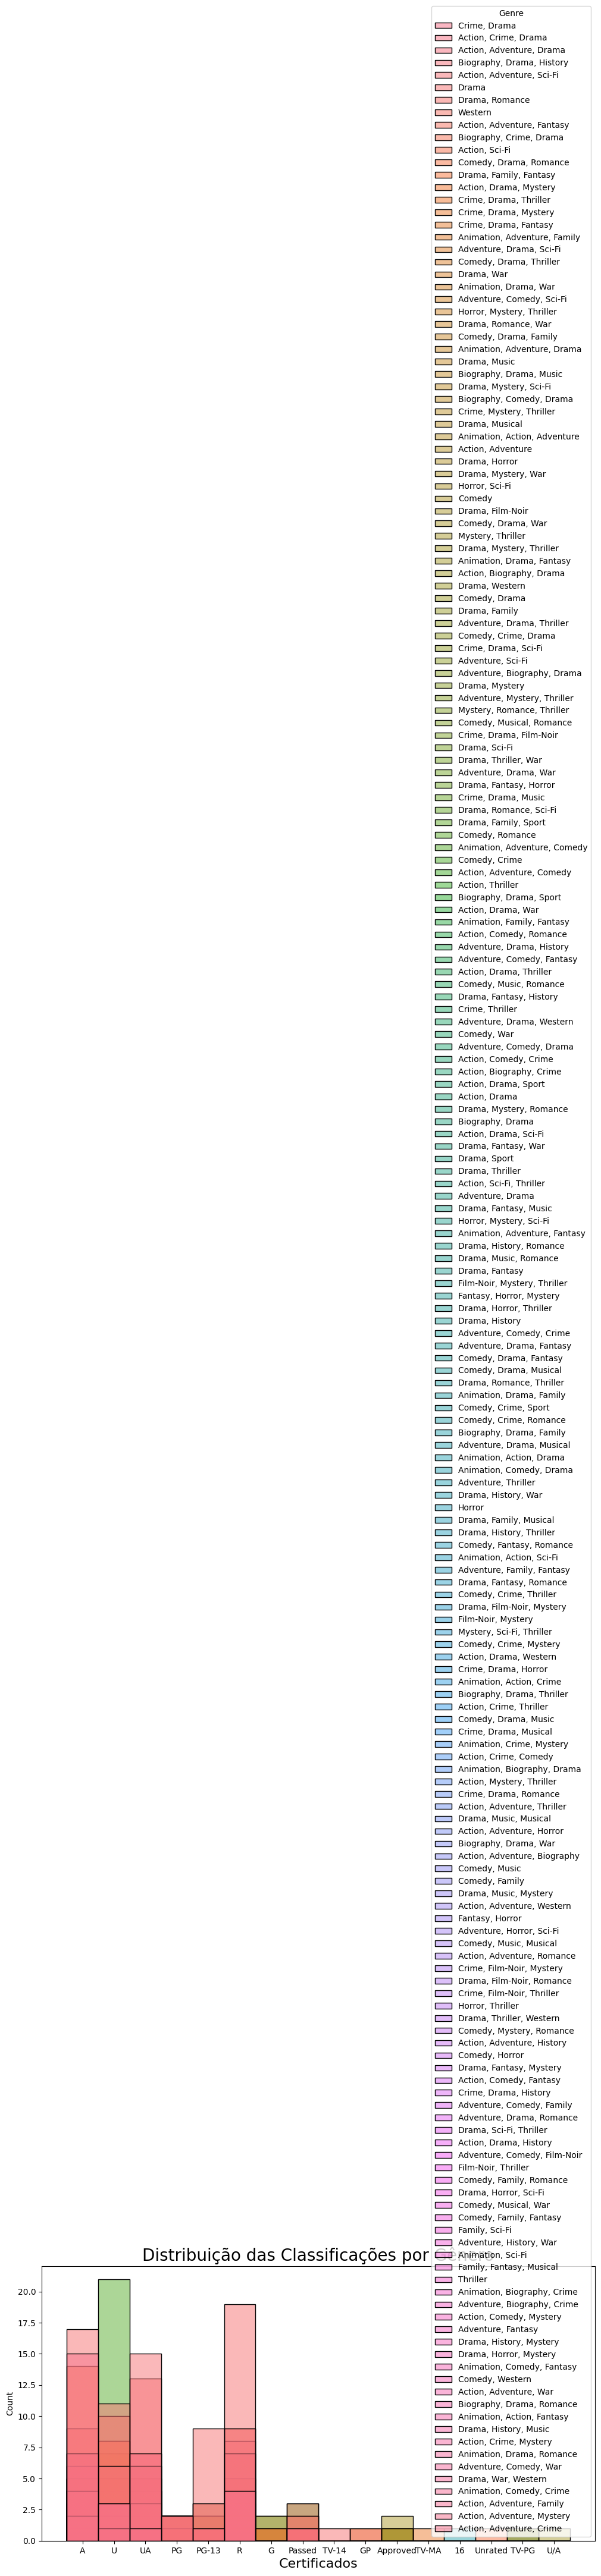

In [12]:
ax = sns.histplot(data=movies_rated_by_imdb, x="Certificate", hue="Genre", bins=50)
ax.set_title("Distribuição das Classificações por Gênero", fontsize=20)
ax.set_xlabel("Certificados", fontsize=16)
ax.figure.set_size_inches(12, 6)

<p>Como pode ser visto no gráfico acima, é difícil prever que um determinado gênero pertence a uma classificação específica. Dessa forma, a probabilidade de adicionarem-se dados incorretos nas linahas NAN é alta.</p>

<h3>Colunas Meta_score e Gross</h3>
<p>Tanto para coluna Meta_score quanto para coluna Gross as variáveis são quantitativas contínuas, dessa forma, pra que a análise seja mais eficiente, essas serão convertidas para o tipo float, já que estão armazenadas como object no dataset. Depois será utilizado o scatterplot pra visualização das métricas. Semelhante à coluna Certificate, a ideia é relacionar a coluna IMDB_Rating à Meta_score. A hipótese é de que quanto melhor classificado o filme no IMDB, maior seria seu faturamento. Casso confirmada essa hipótese, os valores NA na coluna Meta_score serão preenchidos com a média dos Meta_score onde existam IMDB's e que estes sejam semelhantes ao de outras tuplas em que o Meta_score não é NA.</p>

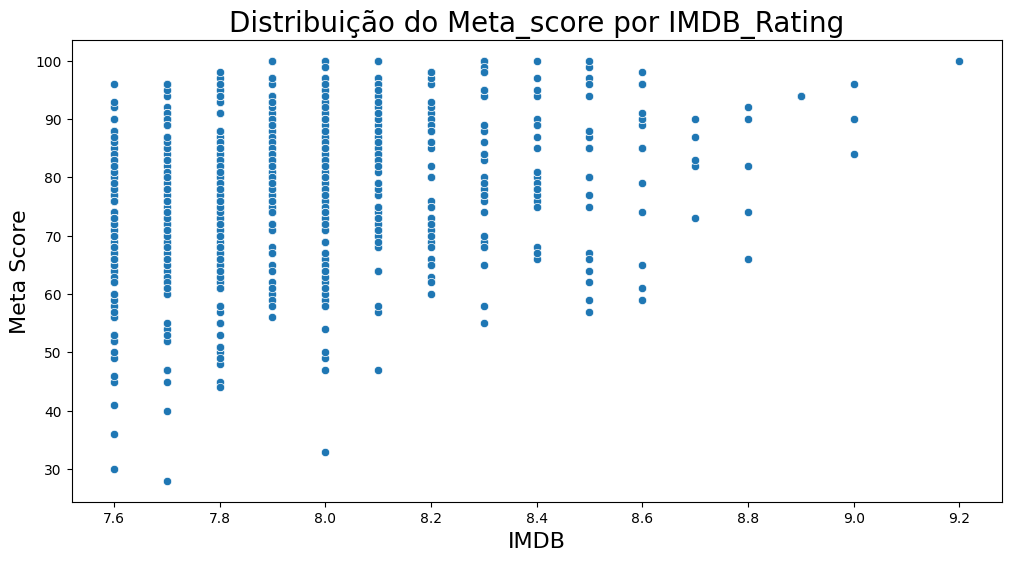

In [13]:
meta_score_check = movies_rated_by_imdb[["IMDB_Rating", "Meta_score"]]
meta_score_check = meta_score_check.dropna()
meta_score_check = meta_score_check.reset_index()
meta_score_check = meta_score_check.drop("index", axis=1)

ax = sns.scatterplot(data=meta_score_check, x="IMDB_Rating", y="Meta_score")
ax.set_title("Distribuição do Meta_score por IMDB_Rating", fontsize=20)
ax.set_ylabel("Meta Score", fontsize=16)
ax.set_xlabel("IMDB", fontsize=16)
ax.figure.set_size_inches(12, 6)

<p>De modo semelhante à análise da coluna Certificate, têm-se dados ambíguos, i.e, para um mesmo valor de IMDB existem vários valores de Meta_score diferentes associados. Assim, não é possível afirmar que as variáveis têm correlação e para evitar a inserção de dados errados, essas tuplas serão igualmente apagadas.</p>
<p>Para a coluna Gross tem-se:</p>

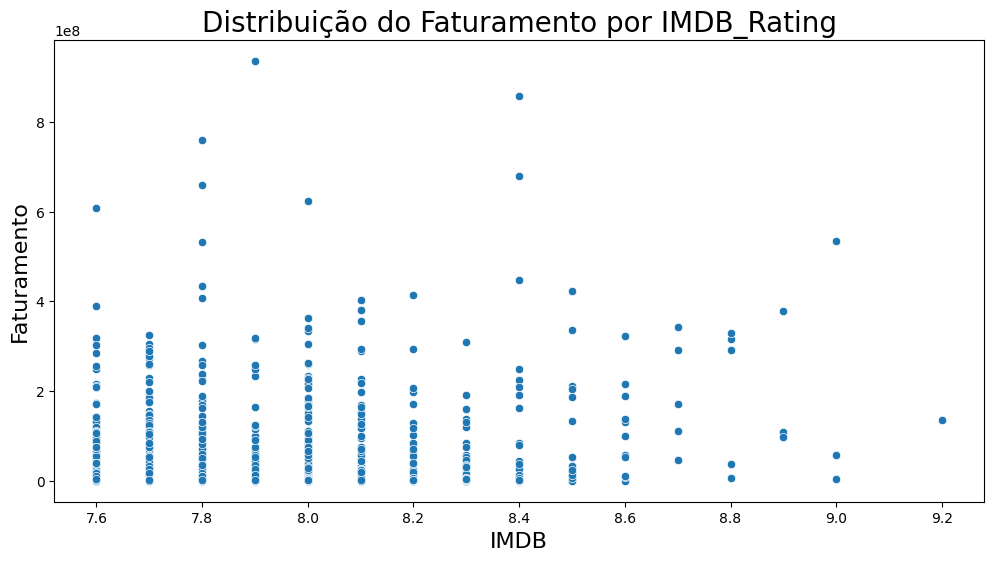

In [14]:
gross_check = movies_rated_by_imdb[["IMDB_Rating", "Gross"]]
gross_check = gross_check.dropna()
gross_check = gross_check.reset_index()
gross_check = gross_check.drop("index", axis=1)
gross_check["Gross"] = gross_check["Gross"].convert_dtypes()
gross_check["Gross"] = gross_check["Gross"].apply(lambda x: x.replace(",", ""))
gross_check["Gross"] = gross_check["Gross"].apply(lambda x: float(x))

ax = sns.scatterplot(data=gross_check, x="IMDB_Rating", y="Gross")
ax.set_title("Distribuição do Faturamento por IMDB_Rating", fontsize=20)
ax.set_ylabel("Faturamento", fontsize=16)
ax.set_xlabel("IMDB", fontsize=16)
ax.figure.set_size_inches(12, 6)

<p>O resultado é semelhante ao anterior, evidenciando que a classificação IMDB do filme não influcia tanto em seu faturamento.</p>

<h3>Dropping NA</h3>

In [15]:
movies_transformed = movies_rated_by_imdb.dropna()
percent_newer_data = (len(movies_transformed)/len(movies_rated_by_imdb))*100
lost_data = round(100 - percent_newer_data, 2)
print(f'O percentual de dados perdidos foi: {lost_data}%')

O percentual de dados perdidos foi: 28.63%


<h3>Continuando a estatística descritiva</h3>

<p>Observa-se que os dados na coluna "IMDB_Rating" não estão tão dispersos pois seu desvio-padrão é baixo, o que não ocorre com as variáveis "Meta_score" e "No_of_Votes". Para um a vizialição mais clara, serão plotados alguns gráficos de dispersão a seguir.

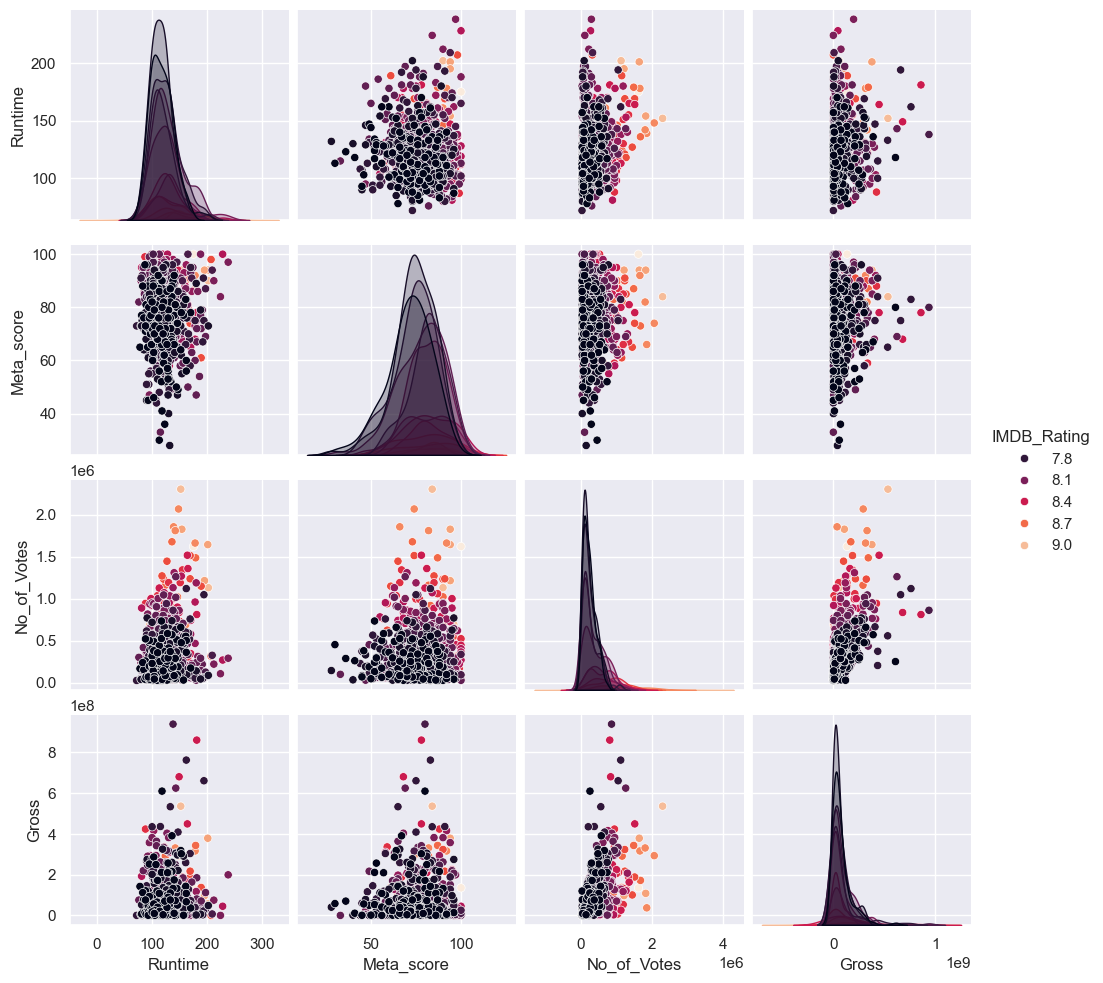

In [16]:
movies_transformed["Gross"]   = movies_transformed["Gross"].convert_dtypes()
movies_transformed["Gross"]   = movies_transformed["Gross"].apply(lambda x: x.replace(",", ""))
movies_transformed["Gross"]   = movies_transformed["Gross"].apply(lambda x: float(x))
movies_transformed["Runtime"] = movies_transformed["Runtime"].str.replace("min", "").astype(int)
sns.set_theme()
sns.pairplot(data=movies_transformed, hue="IMDB_Rating", palette="rocket")

<p>Observa-se que a maioria dos filmes possuem IMDB entre 7.6 e 8.1, as vairáveis No_of_Values e  Meta_score não possuem correlação e os filmes com maior quantidade de votos têm IMDB acima de 8 o que pode indicar uma correlação positiva.</p>

## 2. Desafios

### A - Qual filme eu recomendaria pra uma pessoa que não conehço

<p>Pensando que não conheço a pessoa nem sei sobre suas preferências de gênero, eu recomendaria um filme com classificação livre e com boa nota de crítica, acima de 8.</p>

In [17]:
movies_transformed["Certificate"].unique()

array(['A', 'U', 'UA', 'R', 'G', 'Passed', 'PG-13', 'PG', 'Approved',
       'TV-PG', 'GP', 'U/A'], dtype=object)

In [18]:
movies_transformed[:][(movies_transformed["Certificate"] == "G") & (movies_transformed["Meta_score"] > 8)]

,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
51,City Lights,1931,G,87,"Comedy, Drama, Romance",8.5,"With the aid of a wealthy erratic tippler, a d...",99.0,Charles Chaplin,Charles Chaplin,Virginia Cherrill,Florence Lee,Harry Myers,167839,19181.0
50,Modern Times,1936,G,87,"Comedy, Drama, Family",8.5,The Tramp struggles to live in modern industri...,96.0,Charles Chaplin,Charles Chaplin,Paulette Goddard,Henry Bergman,Tiny Sandford,217881,163245.0
119,Singin' in the Rain,1952,G,103,"Comedy, Musical, Romance",8.3,A silent film production company and cast make...,99.0,Stanley Donen,Gene Kelly,Gene Kelly,Donald O'Connor,Debbie Reynolds,218957,8819028.0
421,Fiddler on the Roof,1971,G,181,"Drama, Family, Musical",8.0,"In prerevolutionary Russia, a Jewish peasant c...",67.0,Norman Jewison,Topol,Norma Crane,Leonard Frey,Molly Picon,39491,80500000.0
400,Beauty and the Beast,1991,G,84,"Animation, Family, Fantasy",8.0,A prince cursed to spend his days as a hideous...,95.0,Gary Trousdale,Kirk Wise,Paige O'Hara,Robby Benson,Jesse Corti,417178,218967620.0
704,The Longest Day,1962,G,178,"Action, Drama, History",7.8,"The events of D-Day, told on a grand scale fro...",75.0,Ken Annakin,Andrew Marton,Gerd Oswald,Bernhard Wicki,Darryl F. Zanuck,52141,39100000.0
818,The Muppet Christmas Carol,1992,G,85,"Comedy, Drama, Family",7.7,The Muppet characters tell their version of th...,64.0,Brian Henson,Michael Caine,Kermit the Frog,Dave Goelz,Miss Piggy,50298,27281507.0
874,Fantasia,1940,G,125,"Animation, Family, Fantasy",7.7,A collection of animated interpretations of gr...,96.0,James Algar,Samuel Armstrong,Ford Beebe Jr.,Norman Ferguson,David Hand,88662,76408097.0
854,The Odd Couple,1968,G,105,Comedy,7.7,"Two friends try sharing an apartment, but thei...",86.0,Gene Saks,Jack Lemmon,Walter Matthau,John Fiedler,Herb Edelman,31572,44527234.0


### B - Quais são os principais fatores que estão relacionados com a alta expectativa de faturamento de um filme?

<p>Primeiro, serão analisadas as variáveis quantitativas pra entender a correlçaõ delas com o faturamento:</p>

In [20]:
quantitative_set = movies_transformed[["Runtime", "IMDB_Rating", "Meta_score", "No_of_Votes", "Gross"]]

In [21]:
quantitative_set.corr()

,Runtime,IMDB_Rating,Meta_score,No_of_Votes,Gross
Runtime,1.000000,0.257640,-0.005948,0.212927,0.169380
IMDB_Rating,0.257640,1.000000,0.283745,0.609239,0.130857
Meta_score,-0.005948,0.283745,1.000000,0.028578,-0.014663
No_of_Votes,0.212927,0.609239,0.028578,1.000000,0.560955
Gross,0.169380,0.130857,-0.014663,0.560955,1.000000


<p>Segundo a matiz de correlação acima, a variável que mais se relaciona com o faturamento é a "No_of_Votes". Visualizando essa relação em um gráfico de regressão linear, tem-se:</p>

In [22]:
gross_hope = movies_transformed[["No_of_Votes", "Gross"]]
gross_hope = gross_hope.reset_index()
gross_hope = gross_hope.drop("index", axis=1)
gross_hope = gross_hope.sort_values(by="Gross")

Text(0.5, 0, 'Número de Votos no IMDB')

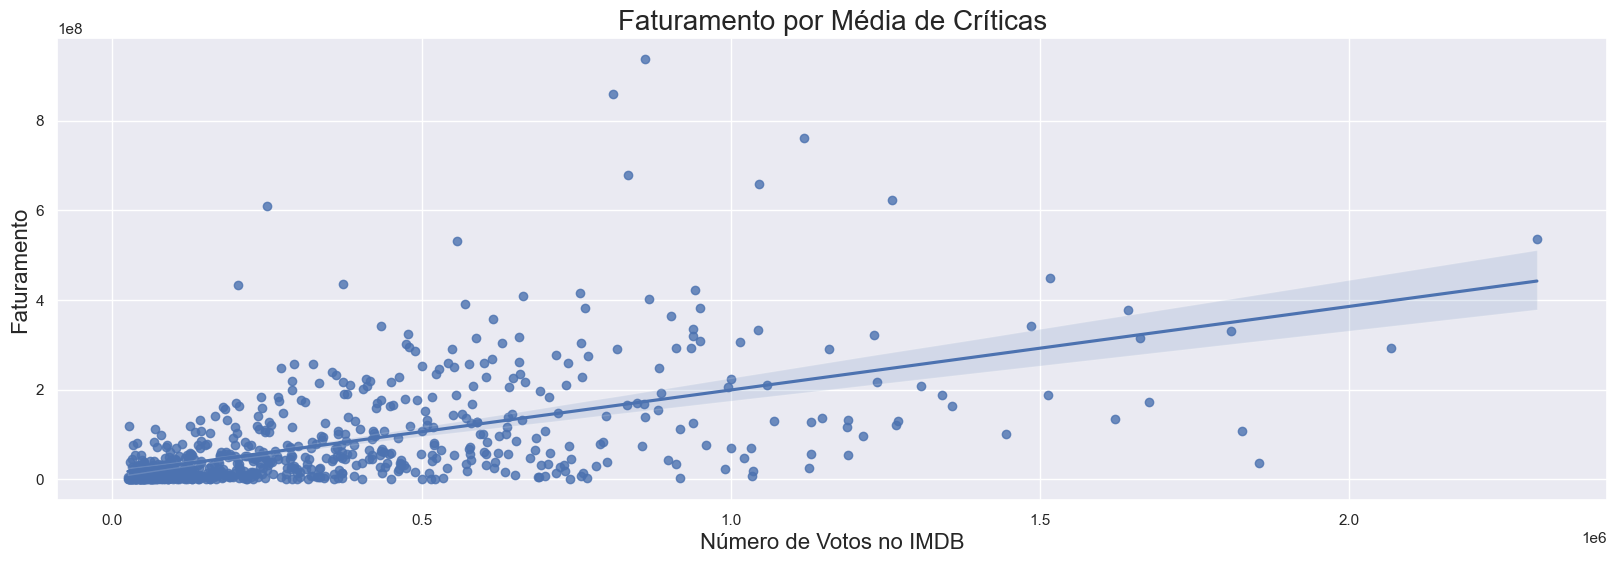

In [23]:
fig, ax = plt.subplots(figsize=(20,6))
ax = sns.regplot(data=gross_hope, x="No_of_Votes", y="Gross" )
ax.set_title("Faturamento por Média de Críticas", fontsize=20)
ax.set_ylabel("Faturamento", fontsize=16)
ax.set_xlabel("Número de Votos no IMDB", fontsize=16)

### C - Quais insights podem ser tirados com a coluna Overview? É possível inferir o gênero do filme a partir dessa coluna?

<p>É interessante saber quais as palavras mais usadas em overviews para guiar futuras redações desses textos. Assim, será feita uma núvem de palavras com o auxilio da biblioteca wordcloud.</p>

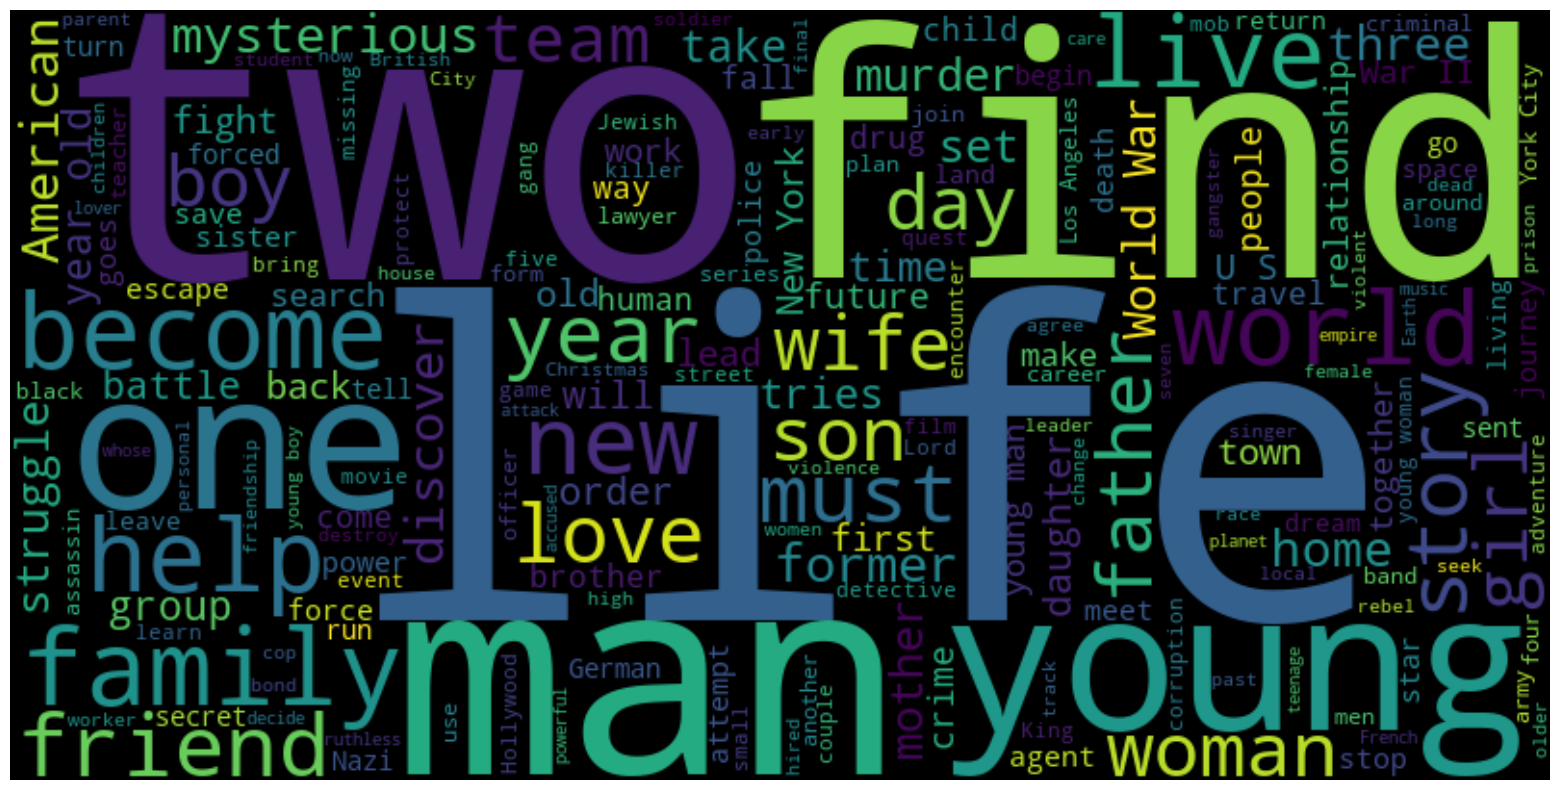

In [24]:
text = " ".join(movies_transformed['Overview'])
wordcloud = WordCloud(width=800, height=400, background_color='black').generate(text)

plt.figure(figsize=(20, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

<p>Abaixo, será testado se a variável overview pode ser prevista a partir da variável Genre.</p>

In [25]:
test_genre_prev_overview = movies_transformed[["Genre", "Overview"]]
test_genre_prev_overview = test_genre_prev_overview.reset_index()
test_genre_prev_overview = test_genre_prev_overview.drop("index", axis=1)
test_genre_prev_overview = test_genre_prev_overview.pivot_table(index="Genre", values="Overview", aggfunc="count")

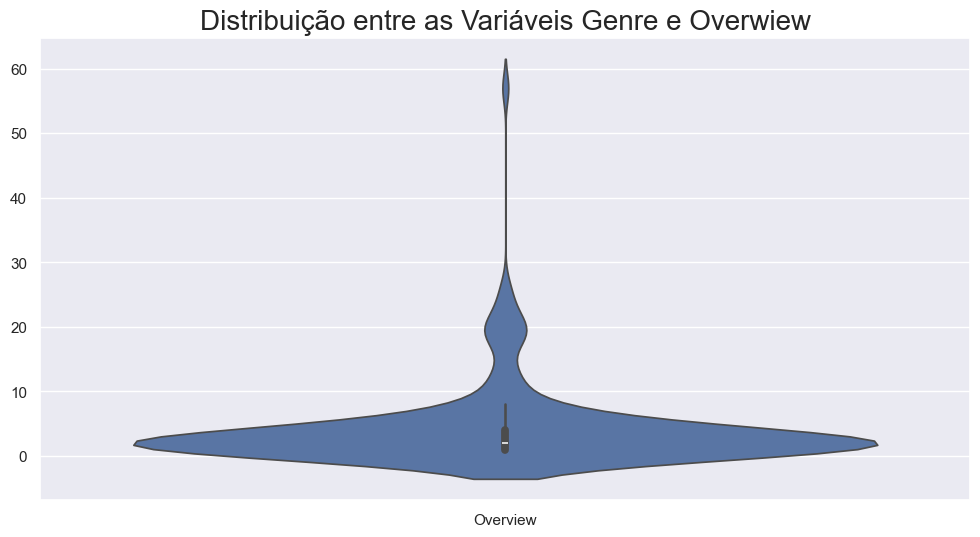

In [26]:
ax = sns.violinplot(data=test_genre_prev_overview)
ax.set_title("Distribuição entre as Variáveis Genre e Overwiew", fontsize=20)
ax.figure.set_size_inches(12, 6)

<p>Como visto no gráfico acima, a maior parte dos dados está concentrada e contém apenas alguns outliers. Isso indica que há uma forte relação entre as variáveis e é possível prever o gênero a partir da coluna Overview.</p>

<h3>
3.	Explique como você faria a previsão da nota do imdb a partir dos dados. Quais variáveis e/ou suas transformações você utilizou e por quê? Qual tipo de problema estamos resolvendo (regressão, classificação)? Qual modelo melhor se aproxima dos dados e quais seus prós e contras? Qual medida de performance do modelo foi escolhida e por quê
</h3>

<p>O IMDB é uma variável quantitativa contínua, dessa forma sua previsão implica em um problema de regressão. Nesse caso, será analisado quais varáveis têm maior correlação com o IMDB pra que se possa escolher um modelo de regressão. Esse tipo de modelo permite analisar várias variáveis independentes e uma depente ao mesmo tempo identificando padrões e tendências. Outra vantagem é a possibilidade de controlar as variáveis indepentes e construir diversos modelos para que se possa cheagar no que mais aproxima nas previsões. Dessa forma, serão selecionadas todas as variáveis quantitavas do dataset para que seja possível analisar suas correlações com a variável de interesse.</p>

In [27]:
model_test  = movies_transformed[["IMDB_Rating", "No_of_Votes", "Meta_score", "Gross", "Runtime"]]
model_test  = model_test.sort_values(by="IMDB_Rating")
model_test  = model_test.reset_index()
model_test  = model_test.drop("index", axis=1)

In [28]:
model_test.corr()

,IMDB_Rating,No_of_Votes,Meta_score,Gross,Runtime
IMDB_Rating,1.000000,0.609239,0.283745,0.130857,0.257640
No_of_Votes,0.609239,1.000000,0.028578,0.560955,0.212927
Meta_score,0.283745,0.028578,1.000000,-0.014663,-0.005948
Gross,0.130857,0.560955,-0.014663,1.000000,0.169380
Runtime,0.257640,0.212927,-0.005948,0.169380,1.000000


<p>De acordo com a tabela acima, forams escolhidas as seguintes variáveis que possuem maior correlação com o IMDB:
    <ul>
        <li><strong>Variável dependente: IMDB_Rating</strong></li> 
        <li><strong>Variáveis Explicativas: No_of_Votes, Meta_score, Runtime</strong></li>
    </ul>
    Uma observação importante é quanto à multicolinearidade, ou seja, analisar a correlação entre as variáveis indepentes/explicativas pois os modelos de         regressão linear podem gerar previsões distorcidas caso haja correlção muito forte entre essas variáveis. Assim, a variável "Gross" srá eliminada do modelo de teste.
</p>

In [29]:
model_test = model_test.drop("Gross", axis=1)
model_test.columns

Index(['IMDB_Rating', 'No_of_Votes', 'Meta_score', 'Runtime'], dtype='object')

<h3>Análise da variável dependente</h3>

<h4>Verificação de Linearidade</h4>

<p>É importante verificar se a variável dependente tem comportamento linear pois é uma limitação do modelo escolhido.</p>

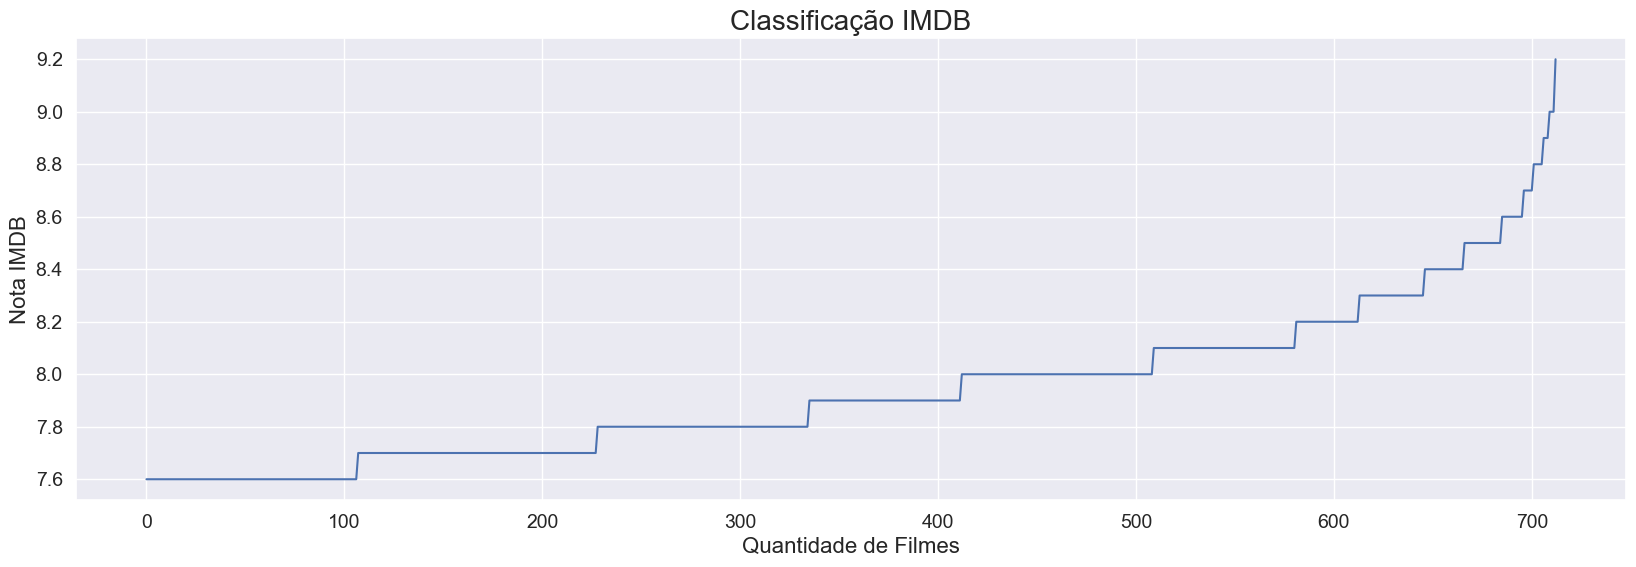

In [30]:
fig, ax = plt.subplots(figsize=(20,6))
ax.set_title("Classificação IMDB", fontsize=20)
ax.set_ylabel("Nota IMDB", fontsize=16)
ax.set_xlabel("Quantidade de Filmes", fontsize=16)
ax = model_test["IMDB_Rating"].plot(fontsize=14)

<h4>Verificação de Dispersão e Outliers</h4>

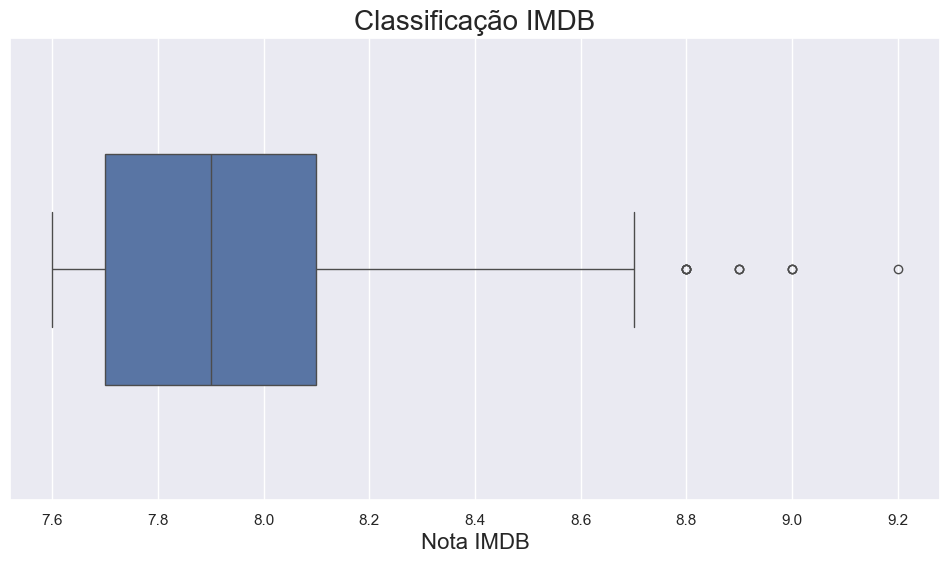

In [31]:
ax = sns.boxplot(data=model_test["IMDB_Rating"], width=.5, orient="h")
ax.set_title("Classificação IMDB", fontsize=20)
ax.set_xlabel("Nota IMDB", fontsize=16)
ax.figure.set_size_inches(12, 6)

<p>Visando a melhorar a previsibilidade do modelo, os outliers vistos na figura acima serão eleiminados do dataset. Isso é necessário pois o modelo de regressão linear é extremamente sensível a outliers.</p>

In [32]:
model_test = model_test[model_test["IMDB_Rating"] < 8.8]

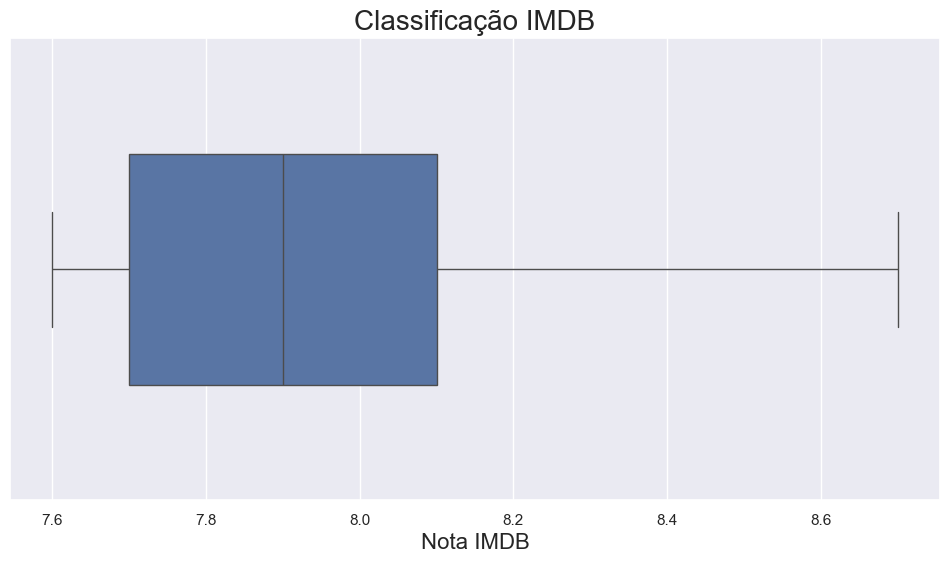

In [33]:
ax = sns.boxplot(data=model_test["IMDB_Rating"], width=.5, orient="h")
ax.set_title("Classificação IMDB", fontsize=20)
ax.set_xlabel("Nota IMDB", fontsize=16)
ax.figure.set_size_inches(12, 6)

<hr>

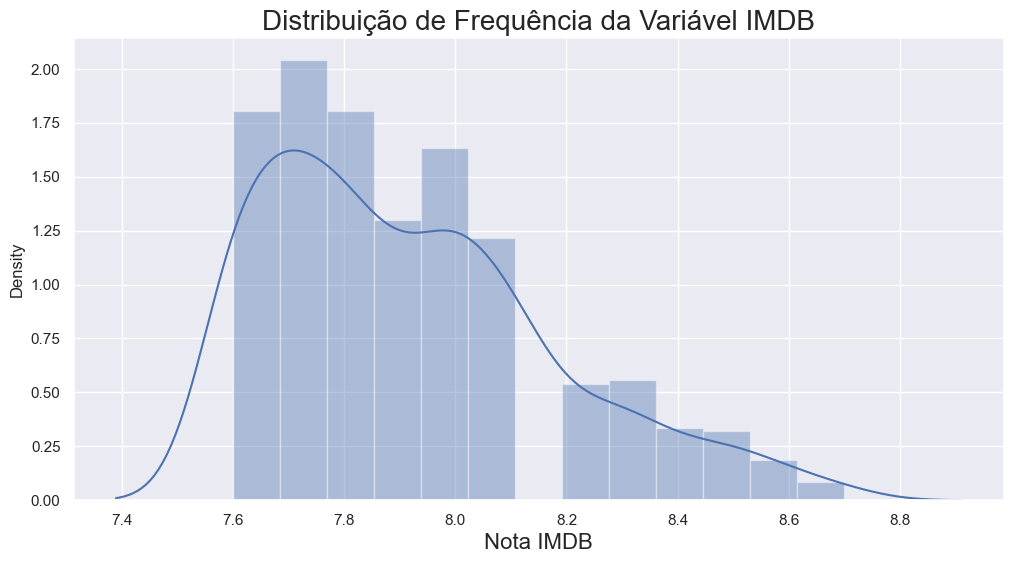

In [34]:
ax = sns.distplot(model_test["IMDB_Rating"])
ax.set_title("Distribuição de Frequência da Variável IMDB", fontsize=20)
ax.set_xlabel("Nota IMDB", fontsize=16)
ax.figure.set_size_inches(12, 6)

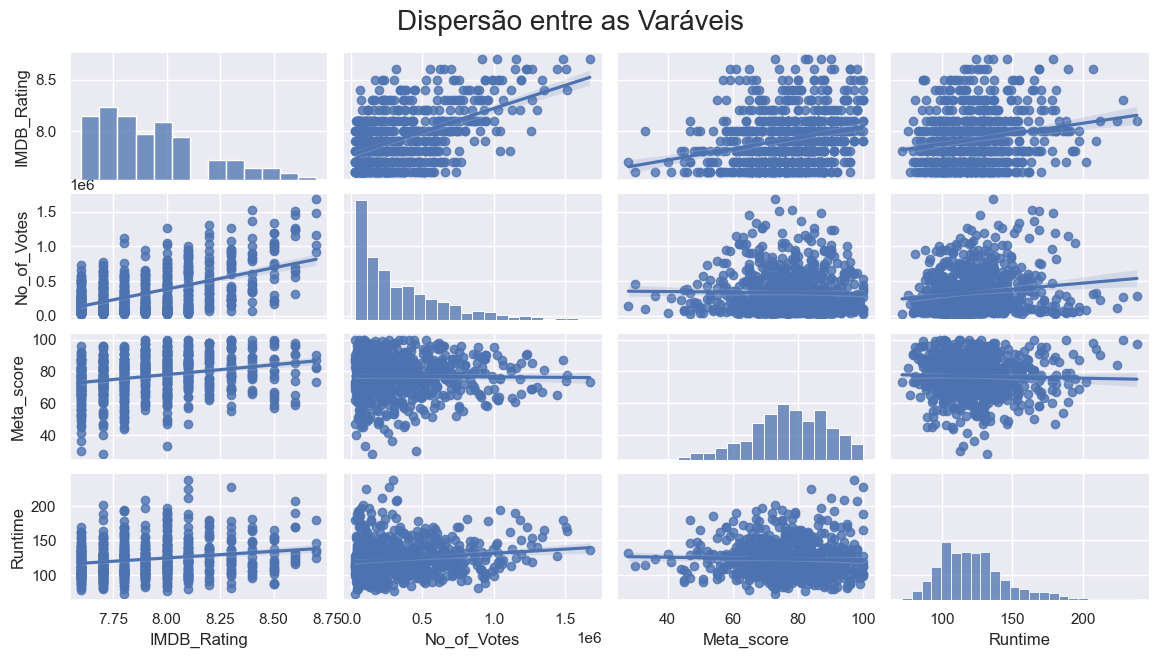

In [35]:
ax = sns.pairplot(data=model_test, kind="reg")
ax.fig.suptitle("Dispersão entre as Varáveis", fontsize=20, y=1.05)
ax.figure.set_size_inches(12, 6)

<p>De acordo com o observado nos gráficos acima, com os dados atuais a distribuição da variável de interesse (IMDB) encontra-se achatada à direita e com bastante dispersão em relação às demais variáveis. Isso deverá impactar negativamente no modelo de previsão. Conforme essas características, o modelo escolhido foi o de regressão linear multivariado (RLM), pois busca-se uma relação (função) de causa-efeito linear entre a variável dependente e as explicativas.</p> 
<hr>

<h3>Construindo Modelo de Previsão</h3>

<h4>Separando as variáveis dependente e explicativas do modelo</h4>

In [36]:
y = model_test["IMDB_Rating"]
X = model_test[["No_of_Votes", "Meta_score", "Runtime"]]

<h4>Criando os modelos de teste e treino com 30% dos dados pra treino e 70% para teste</h4>

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=50)

In [38]:
X_train.shape

(490, 3)

<h4> Gerando modelo de Regressão Linear</h4>

In [39]:
model_reg = linear_model.LinearRegression()

In [40]:
model_reg.fit(X_train, y_train)

LinearRegression()

<h4> Calculando o Coeficiente de Determinação (R²)</h4>
<p>
    Esse coeficiente basicamente diz o quanto as variáveis explicativas determinam o valor da variável dependente e é definido pela fórmula:
    <div style="text-align:center"><img  src="./img/r2_formula.jpg"></div
</p>

In [41]:
print('R² = {}'.format(round(model_reg.score(X_train, y_train), 2)))

R² = 0.36


<h4>Criando Previsão</h4>

In [42]:
y_prev = model_reg.predict(X_test)

In [43]:
score = round(metrics.r2_score(y_test, y_prev), 2)
print('R² = %s' % score)

R² = 0.37


<p>Como previsto, o modelo de previsão foi bastante prejudicado pelo baixo tamanho do dataset e pela dispersão das variáveis. Dessa forma, será adicionado um conjunto de dados obtidos da plataforma Kaggle com variáveis similares visando a aumentar a robustez do modelo.</p>

<h4>Insserção de novos Dados</h4>

In [44]:
data_movies = pd.read_csv("./datasets/data_10k_movies.csv", encoding="utf-8")

In [45]:
data_movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           10000 non-null  int64  
 1   Movie Name           10000 non-null  object 
 2   Year of Release      10000 non-null  int64  
 3   Run Time in minutes  10000 non-null  int64  
 4   Movie Rating         10000 non-null  float64
 5   Votes                10000 non-null  int64  
 6   MetaScore            7974 non-null   float64
 7   Gross                7085 non-null   float64
 8   Genre                10000 non-null  object 
 9   Certification        9631 non-null   object 
 10  Director             10000 non-null  object 
 11  Stars                10000 non-null  object 
 12  Description          10000 non-null  object 
dtypes: float64(3), int64(4), object(6)
memory usage: 1015.8+ KB


In [46]:
columns = model_test.columns
set_data = data_movies[["Movie Rating", "Votes", "MetaScore", "Run Time in minutes"]]
set_data.columns = columns
super_set = pd.concat([model_test, set_data], ignore_index=True)

In [47]:
super_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10701 entries, 0 to 10700
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   IMDB_Rating  10701 non-null  float64
 1   No_of_Votes  10701 non-null  int64  
 2   Meta_score   8675 non-null   float64
 3   Runtime      10701 non-null  int64  
dtypes: float64(2), int64(2)
memory usage: 334.5 KB


In [ ]:
super_set = super_set.dropna()
super_set.info()

In [ ]:
ax = sns.distplot(super_set["IMDB_Rating"])
ax.set_title("Distribuição de Frequência da Variável IMDB Com o Novo Dataset", fontsize=18)
ax.set_xlabel("Nota IMDB", fontsize=16)
ax.figure.set_size_inches(12, 6)

In [ ]:
super_set.corr()

<p>Como é possível ver tanto pelo gráfico de distribuição normal quanto pela matrix de correlação, a inserção de novos dados melhorou significativamente a correlação entre as variáveis.</p>

In [ ]:
y = super_set["IMDB_Rating"]
X = super_set[["No_of_Votes", "Meta_score", "Runtime"]]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=50)

model_reg = linear_model.LinearRegression()
model_reg.fit(X_train, y_train)

In [ ]:
print('R² = {}'.format(round(model_reg.score(X_train, y_train), 2)))

In [ ]:
y_prev = model_reg.predict(X_test)
score_new = round(metrics.r2_score(y_test, y_prev), 2)
print('R² = %s' % score_new)

In [ ]:
print("Ganho de acurácia em relação ao modelo anterior: {}%".format(round((score/score_new)*100, 2)))

In [ ]:
y_prev_train = model_reg.predict(X_train)

In [ ]:
ax = sns.scatterplot(x=y_prev_train, y=y_train)
ax.set_title("Previsto x Real", fontsize=20)
ax.set_ylabel("Nota IMDB Real", fontsize=16)
ax.set_xlabel("Nota IMDB Prevista", fontsize=16)
ax.figure.set_size_inches(12, 6)

<p>Conforme visto acima, os dados de previsão estão pouco dispersos em relação aos dados reais, o que indica previsões mais consistentes.</p>

<h3>Verificação de Resíduos e Homocedasticidade</h3>

In [ ]:
residue = y_train - y_prev_train

In [ ]:
ax = sns.scatterplot(x=y_prev_train, y=residue)
ax.set_title("Resíduo x Previsão", fontsize=20)
ax.set_ylabel("Resíduo", fontsize=16)
ax.set_xlabel("Previsão", fontsize=16)
ax.figure.set_size_inches(12, 6)

<p>No geral o modelo apresenta homogenidade nos resíduos.</p>

<h2>Prevendo um IMDB</h2>
<p>
    Descrição do filme:
    {'Series_Title': 'The Shawshank Redemption',
 'Released_Year': '1994',
 'Certificate': 'A',
 'Runtime': '142 min',
 'Genre': 'Drama',
 'Overview': 'Two imprisoned men bond over a number of years, finding solace and eventual redemption through acts of common decency.',
 'Meta_score': 80.0,
 'Director': 'Frank Darabont',
 'Star1': 'Tim Robbins',
 'Star2': 'Morgan Freeman',
 'Star3': 'Bob Gunton',
 'Star4': 'William Sadler',
 'No_of_Votes': 2343110,
 'Gross': '28,341,469'}

</p>

<p>Para entrada do modelo, necessita-se apenas das vairáveis "No_of_Votes", "Meta_score" e "Runtime"

In [ ]:
entry = {"No_of_Votes": 2343110, "Meta_score":80.0, "Runtime":142}

In [ ]:
set_entry = pd.DataFrame.from_dict(entry, orient ='index')
set_entry = set_entry.T

<p>Portanto a previsão de IMDB para o filme dado é:</p>

In [ ]:
round(model_reg.predict(set_entry)[0], 2)

<h3>Salvando o Modelo</h3>

In [ ]:
import pickle

In [ ]:
output = open("LH_CD_TARCIOSILVA_MODELO_RLM.pkl", "wb")
pickle.dump(model_reg, output)
output.close()